In [0]:
import os
import numpy as np
import pandas as pd
from matplotlib import style
from matplotlib import pyplot as plt

os.chdir('/content/drive/ml_directory/recommend_this/juice_recommender/')

style.use('ggplot')
pd.options.display.float_format = "{:.3f}".format

In [3]:
my_juice_df = pd.read_csv('juice_dataset.csv')
my_juice_df.head()

,fid,juice_name,cold,soar_throat,fever
0,1,Rock The Beet,0,0,1
1,2,Turmeric Sunrise,0,0,1
2,3,Lemon Drop,0,0,1
3,4,Fennel to the Metal,0,0,1
4,5,Dragon Blood,0,0,1


In [4]:
my_juice_df.describe()

,fid,cold,soar_throat,fever
count,66.000,66.000,66.000,66.000
mean,33.500,0.515,0.409,0.379
std,19.196,0.504,0.495,0.489
min,1.000,0.000,0.000,0.000
25%,17.250,0.000,0.000,0.000
50%,33.500,1.000,0.000,0.000
75%,49.750,1.000,1.000,1.000
max,66.000,1.000,1.000,1.000


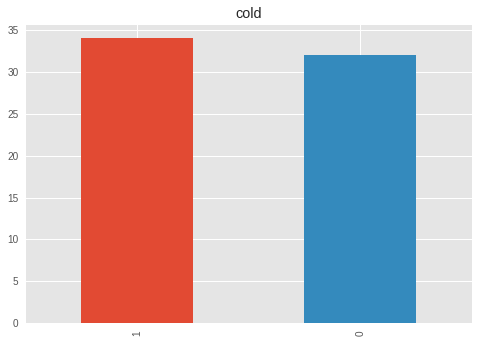

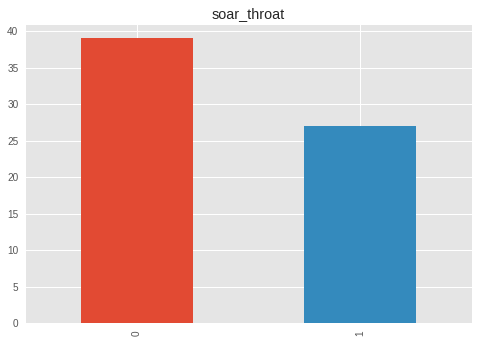

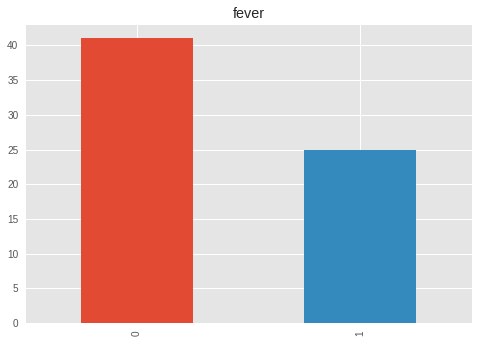

In [6]:
for i in ["cold", "soar_throat", "fever"]:
    pd.value_counts(my_juice_df["{}".format(i)]).plot.bar(title="{}".format(i))
    plt.show()

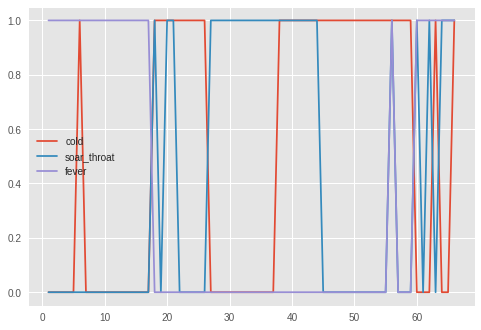

In [7]:
for i in ["cold", "soar_throat", "fever"]:
    plt.plot(
        my_juice_df.fid, my_juice_df["{}".format(i)], label="{}".format(i))
plt.legend()
plt.show()